# text_vectorization_openai

This notebook provides a comprehensive visualization of text vectorization and demonstrates the power of vector search in processing and understanding natural language data. Moreover, it demonstrates the main steps of RAG in a simplified format. </br>

------------------------------------------------------------------------------------
### Dependencies:
To achieve our goals, we rely on the following libraries and models:

>- **text-embedding-ada-002**: This is the embedding model we use, which has an embedding dimension of **1536**. It is designed to capture the semantic meaning of text in a high-dimensional space.
>- **gpt 3.5 turbo**
>- **sklearn.metrics.pairwise.cosine_similarity**: : A function from the scikit-learn library that allows us to compute the similarity between vectors.
>- **sklearn.decomposition.PCA**: Another scikit-learn tool that we use to perform Principal Component Analysis (PCA), reducing the dimensionality of our embeddings to 2 and 3 dimensions for visualization purposes.
>- **matplotlib**: A plotting library that enables us to create 2D and 3D plots to visually represent our data.
>- **mplcursors**: An interactive data cursor for matplotlib, which allows us to explore the plots more intuitively.
------------------------------------------------------------------------------------

### Content Overview:
#### Text embedding explanation

**I. [Define functions](#emb_1)** </br>
We define three key functions to streamline our analysis:

>- plot_2D: A function to generate 2D plots of our vectorized text data.
>- get_embedding: This function utilizes our embedding model to convert text into numerical vectors.
>- compute_cosine_similarity: A utility to compare different text examples based on their vector representations using cosine similarity.


**II. [Define examples](#emb_2)** </br>
>- We introduce 12 examples spanning 4 distinct categories: animals, sports, modern society, and programming. These examples will serve as the basis for our vectorization and visualization.

**III. [Embedding](#emb_3)** </br>
>- Here, we vectorize the examples using our chosen embedding model, transforming the text data into vectors.

**IV. [Apply PCA](#emb_4)** </br>
>- We apply PCA to reduce the dimensionality of our embeddings from 1536 to 3 dimensions, making it possible to visualize the data in a lower-dimensional space.

**V. [Plot 2D](#emb_5)** </br>
>- In this section, we create 2D plots of our examples to observe how text vectorization distinguishes between different categories.

**VI. [Plot 3D](#emb_6)** </br>
>- We extend our visualization to 3D plots, providing another perspective on the separation between categories achieved through vectorization.

**VII. [Computing cosine similarity](#emb_7)** </br>
>- Finally, we compute the cosine similarity between selected examples to illustrate the effectiveness of vector search in identifying similar text data.
------------------------------------------------------------------------------------

#### Simple Retrieval Augmented Generation: (Main steps)</br>

**I. [Step 1: Vectorize the user's query](#rag_1)**

**II. [Step 2: Perfrom vector search between the user's query and the vector database](#rag_2)**

**IV. [Step 3: Retrieve the top `n`` results.](#rag_3)**

**V. [Step 4: Prepare the LLM's input using the retrieved content and the user's query](#rag_4)**

**VI. [Step 5: Pass the input to the LLM and get the response](#rag_5)**

------------------------------------------------------------------------------------

Extra Read:
[Deeplearning.ai](https://www.deeplearning.ai/courses/)

**Load the libraries and OpenAI credentials**

In [8]:
# !pip install mplcursors
# !pip install -q scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [9]:
# Import libraries
import os
import openai
from dotenv import load_dotenv
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from sklearn.decomposition import PCA
from langchain.embeddings.openai import OpenAIEmbeddings
from sklearn.metrics.pairwise import cosine_similarity
from typing import List

# Loading openai credentials
load_dotenv()
openai.api_type = os.getenv("OPENAI_API_TYPE")
openai.api_base = os.getenv("OPENAI_API_BASE")
openai.api_version = os.getenv("OPENAI_API_VERSION")
openai.api_key = os.getenv("OPENAI_API_KEY")

**Load the embedding model libraries**

In [10]:
embedding = OpenAIEmbeddings()

/Users/vahid/.pyenv/versions/3.11.4/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


<a id=emb_1></a>

**Define functions:** plot_2D, get_embedding, compute_cosine_similarity

In [11]:
def plot_2D(x_values: List[float], 
            y_values: List[float], 
            labels: List[str]) -> None:
    """
    Plots a 2D scatter plot with interactive annotations.

    Parameters:
    x_values (List[float]): A list of x-coordinates for each point.
    y_values (List[float]): A list of y-coordinates for each point.
    labels (List[str]): A list of labels for each point.
    """
    # Create scatter plot
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values, 
                         y_values, 
                         alpha = 0.5, 
                         edgecolors='k',
                         s = 40) 

    # Create a mplcursors object to manage the data point interaction
    cursor = mplcursors.cursor(scatter, hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label

    # Define how each annotation should look
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(labels[sel.target.index])
        sel.annotation.get_bbox_patch().set(facecolor='white', alpha=0.5) # Set annotation's background color
        sel.annotation.set_fontsize(12) 

    plt.show()

def get_embedding(text: str) -> List:
    """
    Retrieves the embedding for a given text.

    Parameters:
    text (str): The text to get the embedding for.

    Returns:
    List: The embedding of the given text.
    """
    return embedding.embed_query(text)

def compute_cosine_similarity(embeddings: np.ndarray, idx1: int, idx2: int) -> float:
    """
    Computes the cosine similarity between two embeddings.

    Parameters:
    embeddings (np.ndarray): An array of embeddings.
    idx1 (int): The index of the first embedding.
    idx2 (int): The index of the second embedding.

    Returns:
    float: The cosine similarity between the two embeddings.
    """
    return cosine_similarity([embeddings[idx1]],[embeddings[idx2]])[0][0]

<a id=emb_2></a>
**Let's define 12 Examples in 4 different categories:** 

1. Animals
2. Sport
3. Moder society
4. programming

In [12]:
# Group one 
animal_sen_1 = "Elephants are known for their exceptional memory and intelligence, often living in complex social structures."
animal_sen_2 = "The blue whale is the largest animal on the planet, with a heart the size of a small car."
animal_sen_3 = "Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop."


sport_sen_1 = "Soccer, known as football outside of North America, is the world's most popular sport, with a fan base that spans across continents."
sport_sen_2 = "The modern Olympic Games, revived in 1896, are a global event that brings together athletes from over 200 nations."
sport_sen_3 = "Serena Williams has dominated women's tennis with 23 Grand Slam singles titles, making her one of the greatest athletes of all time."


modern_society_sen_1 = "The advent of the internet has transformed modern society, enabling global connectivity and access to information at an unprecedented scale."
modern_society_sen_2 = "Climate change has become one of the most pressing issues of modern society, with a growing consensus on the need for sustainable practices."
modern_society_sen_3 = "Social media has reshaped the way we communicate and consume information, influencing everything from politics to personal relationships."


programming_sen_1 = "C++ programmers harness the power of low-level memory manipulation, crafting efficient and high-performance software for a variety of applications."
programming_sen_2 = "Java developers thrive in building platform-independent solutions, leveraging the language's 'write once, run anywhere' philosophy for versatile and scalable applications."
programming_sen_3 = "Python programmers embrace the language's readability and expressiveness, creating elegant and concise code that facilitates rapid development across diverse domains."

# combine all the examples in one list
all_input_text = [
    animal_sen_1, animal_sen_2, animal_sen_3,
    sport_sen_1, sport_sen_2, sport_sen_3, 
    modern_society_sen_1, modern_society_sen_2, modern_society_sen_3,
    programming_sen_1, programming_sen_2, programming_sen_3
    ]

<a id=emb_3></a>

**Apply Embedding**

In [13]:
embeddings = []
for input_text in all_input_text:
    emb = get_embedding(input_text)
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings)
print("Shape: " + str(embeddings_array.shape), "\n")
print("Sample array:", embeddings_array[0])

Shape: (12, 1536) 

Sample array: [-0.02045491 -0.00225689  0.00741302 ... -0.01997746  0.00038204
 -0.02907411]


<a id=emb_4></a>

**Apply PCA**

In [14]:
# Perform PCA for reducing the dimension from 1536 to 3
PCA_model = PCA(n_components=3)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (12, 3)
[[-0.00488263 -0.18561928 -0.17714146]
 [ 0.1626858  -0.29699095 -0.21090473]
 [ 0.13651129 -0.28903919 -0.01654235]
 [ 0.173003    0.04363009  0.22152803]
 [ 0.15422932  0.04198942  0.25511295]
 [ 0.22536233  0.00603509  0.22542754]
 [ 0.03954305  0.26303692 -0.15677605]
 [ 0.08553538  0.18529625 -0.10315006]
 [ 0.0869928   0.28772568 -0.20706412]
 [-0.35653552 -0.03415696 -0.00272921]
 [-0.34067045  0.0046663   0.07604987]
 [-0.36177437 -0.02657337  0.09618959]]


<a id=emb_5></a>

**2D plot**

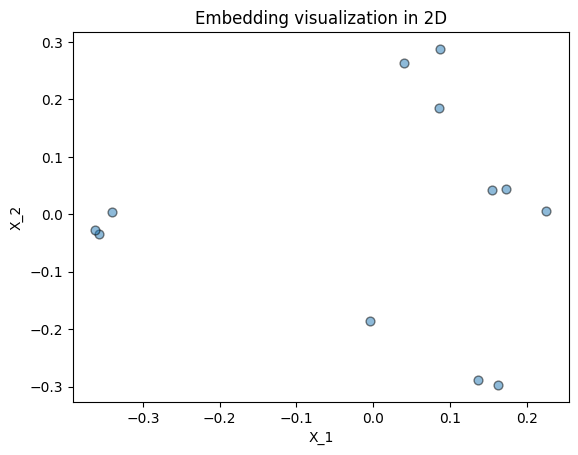

In [15]:
plot_2D(new_values[:,0], new_values[:,1], all_input_text)

<a id=emb_6></a>

**3D plot**

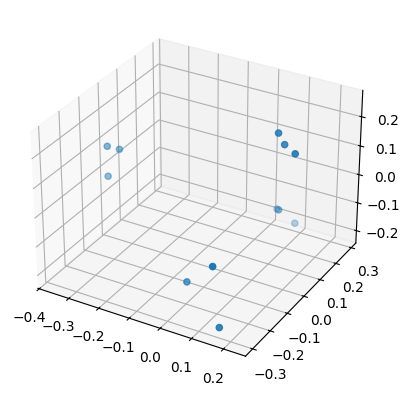

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(new_values[:, 0], new_values[:, 1], new_values[:, 2])

<a id=emb_7></a>
**Computing the cosine similarity**

- animal_sen_1: 0, animal_sen_2: 1, animal_sen_3: 2 </br>
- sport_sen_1: 3, sport_sen_2: 4, sport_sen_3: 5</br> 
- modern_society_sen_1: 6, modern_society_sen_2: 7, modern_society_sen_3: 8</br>
- programming_sen_1: 9, programming_sen_2: 10, programming_sen_3: 11

In [17]:
print("animal_sen_1 vs animal_sen_2:", compute_cosine_similarity(embeddings,0,1))
print("animal_sen_1 vs programming_sen_1:", compute_cosine_similarity(embeddings,0,10))

print("sport_sen_1 vs sport_sen_2:", compute_cosine_similarity(embeddings,3,4))
print("sport_sen_1 vs programming_sen_11:", compute_cosine_similarity(embeddings,3,11))

animal_sen_1 vs animal_sen_2: 0.7936298430992275
animal_sen_1 vs programming_sen_1: 0.753926591600932
sport_sen_1 vs sport_sen_2: 0.8247985576275556
sport_sen_1 vs programming_sen_11: 0.7380493887832311


## Simple RAG

Let's consider `embeddings` list to be our Vector database and search a query over it and return the results 

<a id=rag_1></a>
**Step 1: Vectorize the user's query** 

In [18]:
query = "What are some remarkable characteristics of elephants?"
q_v = get_embedding(query)

<a id=rag_2></a>
**Step 2: Perfrom vector search between the user's query and the vector database** 

In [19]:
def search(embeddings:List, q_v:List)->List[float]:
    """
    Search for the cosine similarity scores between a query vector (q_v) and a list of embedding vectors.

    Parameters:
        embeddings (List[List[float]]): A list of embedding vectors.
        q_v (List[float]): The query vector for which the cosine similarity scores are calculated.

    Returns:
        List[float]: A list of cosine similarity scores between the query vector and each embedding vector.
    """
    scores = []
    for vec in embeddings:
        scores.append(cosine_similarity([vec], [q_v])[0][0])
    return scores

score_list = search(embeddings, q_v)
score_list

[0.8979636450708526,
 0.7961396732668061,
 0.7479150855090576,
 0.7158517698386552,
 0.7308154772626785,
 0.7253848239746694,
 0.7331495880578893,
 0.723085622912839,
 0.7175419295901722,
 0.7215906396062827,
 0.7287541603050346,
 0.7337037635451182]

<a id=rag_3></a>
**Step 3: Retrieve the top `n` results.**

In [20]:
n = 3
sorted_indices = np.argsort(score_list)[::-1]
top_n_indices = sorted_indices[:n]
top_n_indices

retrieved_content = []
for i in top_n_indices:
    print(all_input_text[i], "\n")
    retrieved_content.append(all_input_text[i])

Elephants are known for their exceptional memory and intelligence, often living in complex social structures. 

The blue whale is the largest animal on the planet, with a heart the size of a small car. 

Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop. 



<a id=rag_4></a>

**Step 4: Prepare the LLM's input using the retrieved content and the user's query**

We want to Pass the retrieved content along with the user's query to a LLM to get the proper response. The role of the LLM is to see whether the retrieved content contain the answer to the user's question and provide a clean and organized response.

In [21]:
gpt_model = "gpt-35-turbo"
temperature= 0
# prompt = "I have a chatbot in streamlit code. i want to change the avatar of user and chatbot. Give me the code"
llm_system_role = "As a helpful chatbot, your role is to assist users by analyzing their questions alongside retrieved content.\
        Dispense answers exclusively from the provided content and refrain from incorporating personal knowledge if the answer is\
        absent in the retrieved information."
prompt = f"# Retrieved content: {retrieved_content}\n\n# User's query: {query}"
print(prompt)

# Retrieved content: ['Elephants are known for their exceptional memory and intelligence, often living in complex social structures.', 'The blue whale is the largest animal on the planet, with a heart the size of a small car.', 'Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop.']

# User's query: What are some remarkable characteristics of elephants?


<a id=rag_5></a>

**Step 5: Pass the input to the LLM and get the response**

In [22]:
gpt_model = "gpt-35-turbo"
temperature= 0

response = openai.ChatCompletion.create(
            engine=gpt_model,
            messages=[
                {"role": "system", "content": llm_system_role},
                {"role": "user", "content": prompt}
            ],
            temperature=temperature,
            stream=False
        )

APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [15]:
response.choices[0].message.content

'Some remarkable characteristics of elephants include their exceptional memory and intelligence, as well as their ability to live in complex social structures.'